In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

### Customer Data Exploration

In [15]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [17]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


### Customer Distribution by Region

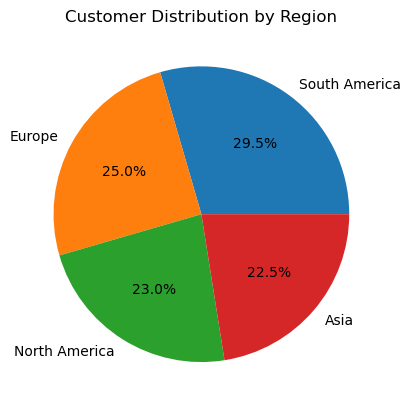

In [19]:
region_count = customers['Region'].value_counts()

fig, ax = plt.subplots()
ax.pie(region_count, labels=region_count.index, autopct="%1.1f%%")
plt.title('Customer Distribution by Region')
plt.show()

#### Key Insights: Customer Signups by Region
- **South America**: 29.5% (highest)
- **Europe**: 25.0%
- **North America**: 23.0%
- **Asia**: 22.5%

In [21]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

### Signup Date Range

In [23]:
print('Minimum signup date: ',customers['SignupDate'].min())
print('Maximum signup date: ', customers['SignupDate'].max())

Minimum signup date:  2022-01-22 00:00:00
Maximum signup date:  2024-12-28 00:00:00


##### The customers signup dates range from the year 2022 to 2024

In [25]:
customers['SignupYear'] = pd.to_datetime(customers['SignupDate']).dt.year

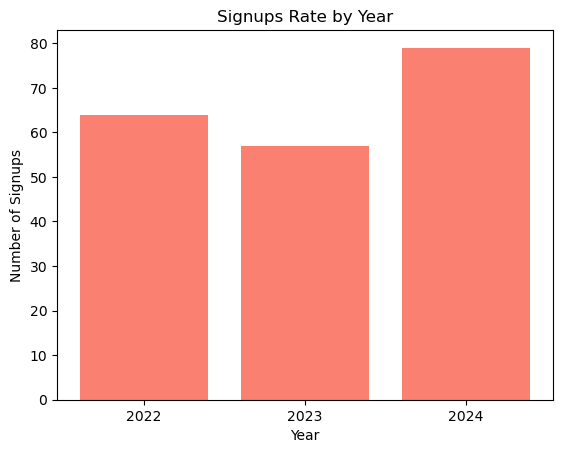

In [70]:
signup_counts = customers['SignupYear'].value_counts().sort_index()

plt.bar(signup_counts.index, signup_counts.values, color='salmon')
plt.title('Signups Rate by Year')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.xticks(signup_counts.index)
plt.show()

##### There has been a steady increase in the number of signups over the years 2022 to 2024 but compared to the year 2022, 2023 has a slight decrease in signups and in the year 2024 there has been an significant increase of signups.

### Product Data Exploration

In [29]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [31]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


### Prices of the Products Based on Category

In [33]:
category_prices = products.groupby('Category')['Price']

In [35]:
category_prices.min()

Category
Books          33.59
Clothing       18.82
Electronics    16.08
Home Decor     41.18
Name: Price, dtype: float64

In [37]:
category_prices.max()

Category
Books          497.76
Clothing       481.78
Electronics    459.86
Home Decor     454.53
Name: Price, dtype: float64

### Average Prices for each Category

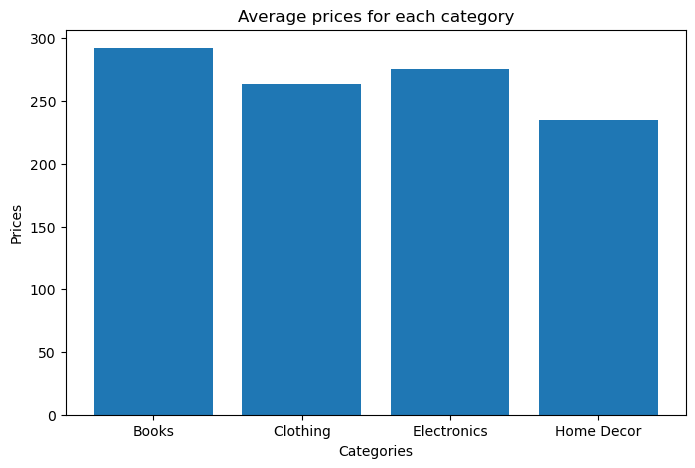

In [39]:
plt.figure(figsize=(8, 5))
plt.bar(category_prices.mean().index, category_prices.mean().values)
plt.title('Average prices for each category')
plt.xlabel('Categories')
plt.ylabel('Prices')
plt.show()

#### Key Findings
- **Books** Have the highest average price, followed by **Electronics**.
- **Home Decor** items have the lowest average price.
- **Clothing** falls between the other categories, with a average price closer to Electronics and Books.

### Transactions Data Exploration

In [41]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [43]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [45]:
transactions.rename(columns={'Price': 'ProductPrice'}, inplace=True)

In [47]:
transactions_customers = pd.merge(transactions, customers, how='inner', on='CustomerID')

full_data = pd.merge(transactions_customers, products, how='inner', on='ProductID')

In [49]:
full_data.drop('Price', axis=1, inplace=True)

In [47]:
full_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,ProductPrice,CustomerName,Region,SignupDate,SignupYear,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,2022,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,2024,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,2024,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,2024,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,2022,ComfortLiving Bluetooth Speaker,Electronics


In [51]:
full_data['TransactionDate'] = pd.to_datetime(full_data['TransactionDate'])

In [53]:
print('Minimum transaction date: ', full_data['TransactionDate'].min())
print('Maximum transaction date: ', full_data['TransactionDate'].max())

Minimum transaction date:  2023-12-30 15:29:12
Maximum transaction date:  2024-12-28 11:00:00


##### Even though the customer signups are in between the years 2022 to 2024 almost all of the transactions are made in the year 2024.

In [56]:
full_data['TransactionMonth'] = full_data['TransactionDate'].dt.to_period('M')

### Monthly Transaction Rate

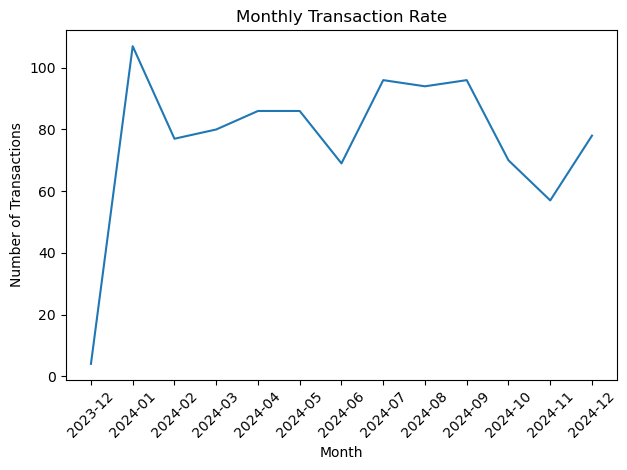

In [58]:
monthly_transactions = full_data['TransactionMonth'].value_counts().sort_index()
monthly_transactions.index = monthly_transactions.index.astype(str)

plt.plot(monthly_transactions.index, monthly_transactions.values)
plt.title('Monthly Transaction Rate')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The monthly transaction rate shows a sharp increase in january 2024, followed by a decline in February.
- The rate then increased again in march and april, reaching a peak in may.
- After may, the rate face dip and peaks until november with a slight recovery in December.

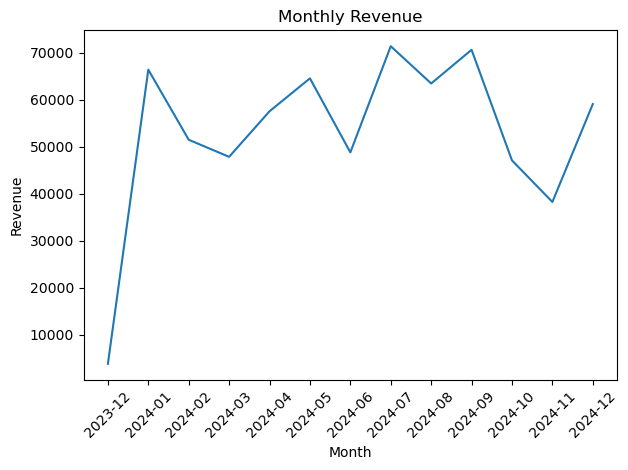

In [84]:
monthly_transactions = full_data.groupby('TransactionMonth')['TotalValue'].sum()
monthly_transactions.index = monthly_transactions.index.astype(str)

plt.plot(monthly_transactions)
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Revenue made from different regions

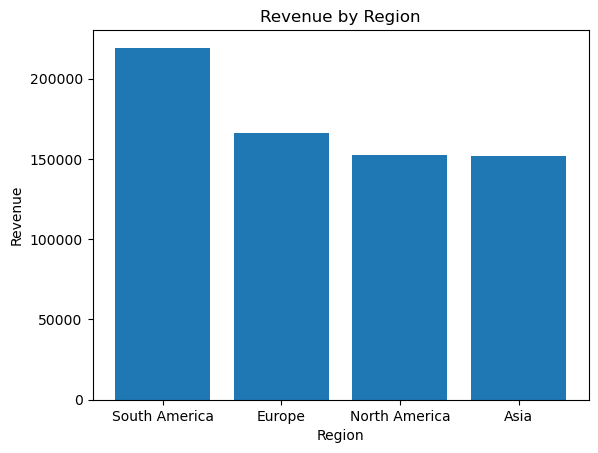

In [60]:
region_values = full_data.groupby('Region')['TotalValue'].sum()
region_values.sort_values(ascending=False, inplace=True)

plt.bar(region_values.index, region_values.values)
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.show()

### Revenue made from different categories

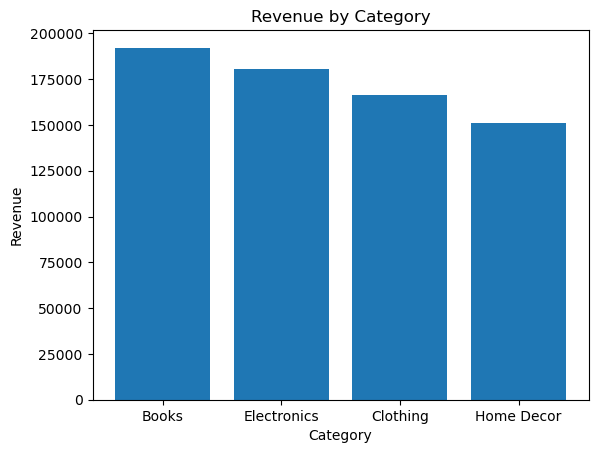

In [63]:
category_values = full_data.groupby('Category')['TotalValue'].sum()
category_values.sort_values(ascending=False, inplace=True)

plt.bar(category_values.index, category_values.values)
plt.title('Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.show()

### Most frequenctly bought products

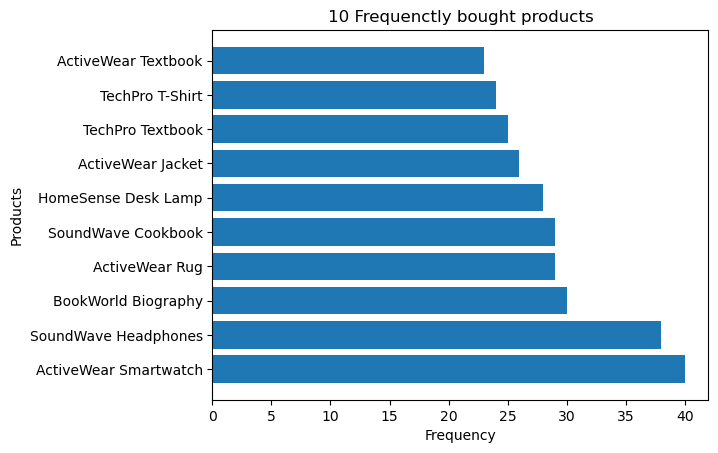

In [65]:
product_names = full_data['ProductName'].value_counts()

plt.barh(product_names.head(10).index, product_names.head(10).values)
plt.title('10 Frequenctly bought products')
plt.xlabel('Frequency')
plt.ylabel('Products')
plt.show()

### Top 10 Products with Highest Revenue

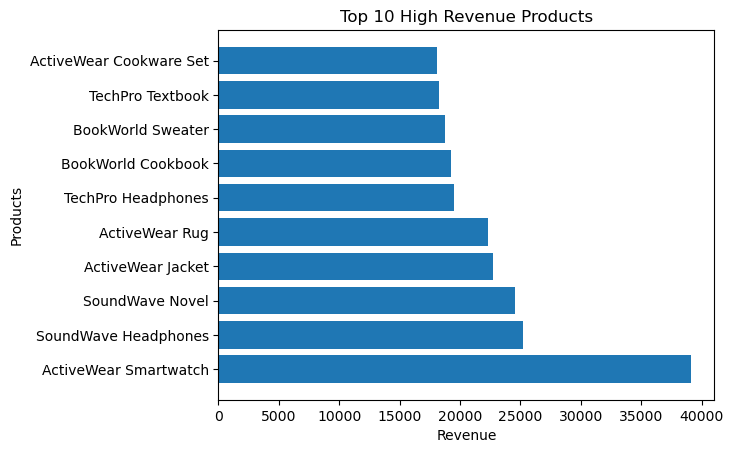

In [67]:
product_values = full_data.groupby('ProductName')['TotalValue'].sum()
product_values.sort_values(ascending=False, inplace=True)

plt.barh(product_values.head(10).index, product_values.head(10).values)
plt.title('Top 10 High Revenue Products')
plt.xlabel('Revenue')
plt.ylabel('Products')
plt.show()

### Pareto Analysis: Top 20% of customer contribute 80% of the revenue

By using this analysis you can identify the top 20% of customers who contribute to 80% of the company's revenue.

In [66]:
customer_revenue = full_data.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_revenue = customer_revenue.rename(columns={'TotalValue': 'TotalRevenue'})
customer_revenue = customer_revenue.sort_values(by='TotalRevenue', ascending=False)

In [68]:
customer_revenue['CumulativeRevenue'] = customer_revenue['TotalRevenue'].cumsum()
customer_revenue['CumulativeRevenuePercentage'] = 100 * (customer_revenue['CumulativeRevenue']/customer_revenue['TotalRevenue'].sum())

In [70]:
customer_revenue['CustomerRank'] = range(1, len(customer_revenue) + 1)
customer_revenue['CustomerPercentage'] = 100 * (customer_revenue['CustomerRank']/len(customer_revenue))
top_20_customers = customer_revenue[customer_revenue["CumulativeRevenuePercentage"] <= 80]

In [72]:
top_20_customers

,CustomerID,TotalRevenue,CumulativeRevenue,CumulativeRevenuePercentage,CustomerRank,CustomerPercentage
140,C0141,10673.87,10673.87,1.546948,1,0.502513
53,C0054,8040.39,18714.26,2.712229,2,1.005025
64,C0065,7663.70,26377.96,3.822917,3,1.507538
155,C0156,7634.45,34012.41,4.929367,4,2.010050
81,C0082,7572.91,41585.32,6.026897,5,2.512563
...,...,...,...,...,...,...
159,C0160,2926.93,540016.06,78.263701,116,58.291457
173,C0174,2891.95,542908.01,78.682827,117,58.793970
132,C0133,2884.33,545792.34,79.100848,118,59.296482
68,C0069,2878.69,548671.03,79.518052,119,59.798995


The above are the top 20% customers.

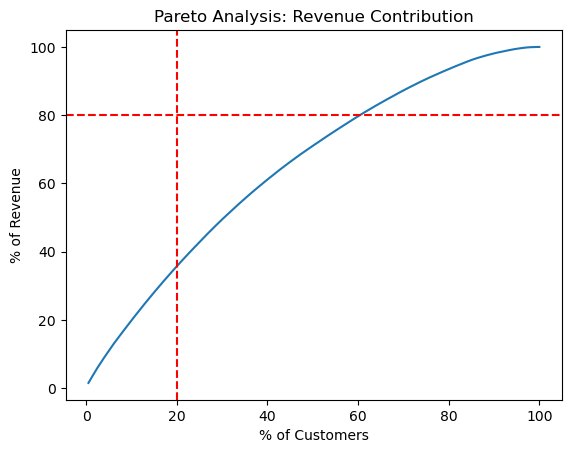

In [74]:
plt.plot(customer_revenue['CustomerPercentage'], customer_revenue['CumulativeRevenuePercentage'])
plt.axhline(y=80, color='r', linestyle='--')
plt.axvline(x=20, color='r', linestyle='--')
plt.title('Pareto Analysis: Revenue Contribution')
plt.xlabel('% of Customers')
plt.ylabel('% of Revenue')
plt.show()

### Average Profit Margin for Product Category and Region

In [76]:
full_data['Profit'] = full_data['TotalValue'] - (full_data['ProductPrice'] * full_data['Quantity'])
full_data['ProfitMargin'] = (full_data['Profit'] / full_data['TotalValue']) * 100

In [78]:
category_profit = full_data.groupby('Category')['ProfitMargin'].mean().reset_index()
region_profit = full_data.groupby('Region')['ProfitMargin'].mean().reset_index()

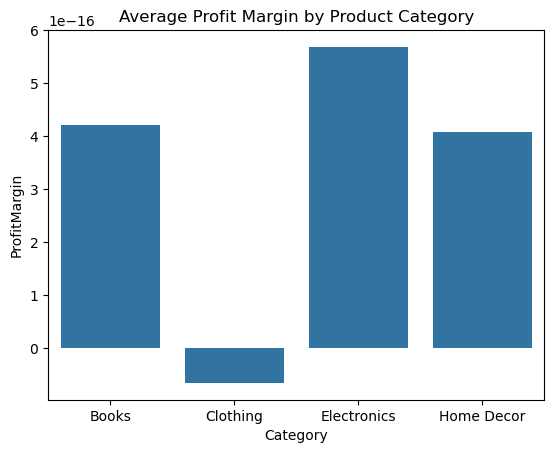

In [80]:
sns.barplot(data=category_profit, x='Category', y='ProfitMargin')
plt.title('Average Profit Margin by Product Category')
plt.show()

Even though the revenues generated by different categories are high the profit margin is low might be because:
- The category may rely on sales, discounts, or promotions.
- It might have higher production, sourcing, or material costs.
- Intense competition could force lower pricing strategies to attract customers.
- Additional costs such as returns, exchanges.

- The bar for Electronics is the tallest, indicating it generates the highest average profit margin among all categories
- The bar for Clothing is significantly shorter, showing that it contributes very little to profit margin compared to other categories.
- Books and Home Decor have moderate and comparable profit margins.

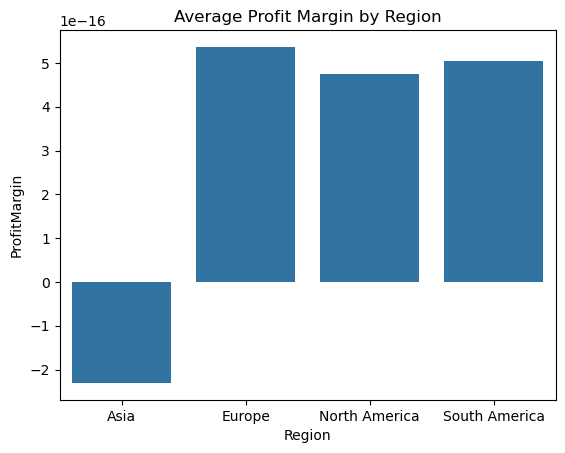

In [82]:
sns.barplot(data=region_profit, x='Region', y='ProfitMargin')
plt.title('Average Profit Margin by Region')
plt.show()

While the revenues generated from different regions are high the profit margins are less because:
- Certain regions may have higher operational expenses, such as labor costs, taxes, or logistics.
- In regions with high competition, companies may adopt aggressive pricing strategies or offer discounts.
- Customers in specific regions may favor lower-priced products or require additional incentives.

- The bar for Europe is the tallest, indicating it generate the highest average profit margin among other continents.
- The bar for Asia is way shorter, showing that it generates low profit margin.
- South America and North America profit margins are close and comparable to Europe and also generates the high profit margins